In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,recall_score,f1_score

In [4]:
sample=load_breast_cancer().data
label=load_breast_cancer().target
print(sample.shape,label.shape)

(569, 30) (569,)


In [9]:
regr_1=LogisticRegression(penalty='l1',solver='liblinear',random_state=0,C=0.5,max_iter=1000)
regr_2=LogisticRegression(penalty='l2',solver='liblinear',random_state=0,C=0.5,max_iter=1000)

regr_1.fit(sample,label)
print((regr_1.coef_!=0).sum(axis=1))

regr_2.fit(sample,label)
print((regr_2.coef_!=0).sum(axis=1))

[10]
[30]


In [49]:
x_train,x_test,y_train,y_test=train_test_split(sample,label,train_size=0.8,random_state=0)


train_scores=dict()
test_scores=dict()
for i in np.arange(0.01,1,0.01):
    regr_1=LogisticRegression(penalty='l1',solver='liblinear',random_state=0,C=i,max_iter=1000)
    regr_2=LogisticRegression(penalty='l2',solver='liblinear',random_state=0,C=i,max_iter=1000)
    regr_1.fit(x_train,y_train)
    regr_2.fit(x_train,y_train)
    y_pred1=regr_1.predict(x_train)
    y_pred2=regr_2.predict(x_train)
    train_scores['regr_1']=train_scores.get('regr_1',[])+[regr_1.score(x_train,y_train)]
    train_scores['regr_2']=train_scores.get('regr_2',[])+[regr_2.score(x_train,y_train)]
    test_scores['regr_1']=test_scores.get('regr_1',[])+[accuracy_score(y_pred1,y_train)]
    test_scores['regr_2']=test_scores.get('regr_2',[])+[accuracy_score(y_pred2,y_train)]

Text(0.5, 1.0, 'regr_2 testscore')

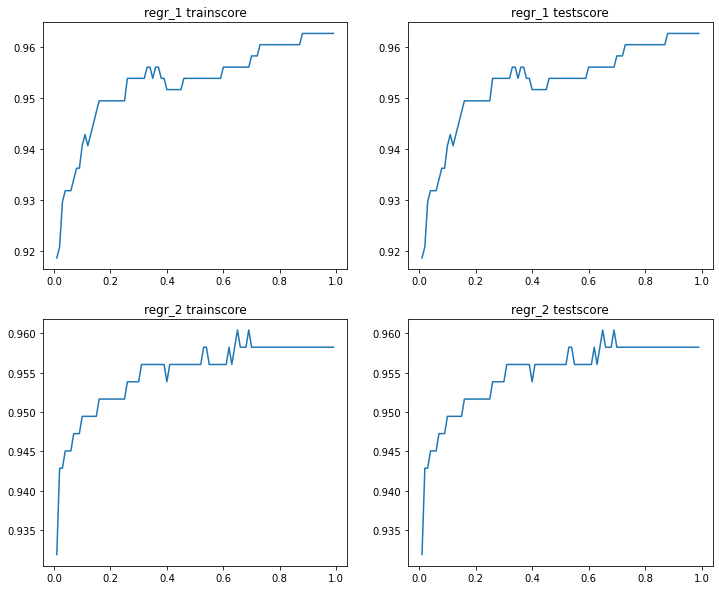

In [53]:
fig=plt.figure(figsize=(12,10))
ax1=fig.add_subplot(221)
ax1.plot(np.arange(0.01,1,0.01),train_scores['regr_1'])
ax1.set_title('regr_1 trainscore')
ax2=fig.add_subplot(222)
ax2.plot(np.arange(0.01,1,0.01),test_scores['regr_1'])
ax2.set_title('regr_1 testscore')
ax3=fig.add_subplot(223)
ax3.plot(np.arange(0.01,1,0.01),train_scores['regr_2'])
ax3.set_title('regr_2 trainscore')
ax4=fig.add_subplot(224)
ax4.plot(np.arange(0.01,1,0.01),test_scores['regr_2'])
ax4.set_title('regr_2 testscore')

## Embedded + LogisticRegression

In [56]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [66]:
data=load_breast_cancer()
sample=data['data']
label=data['target']
print(sample.shape)

(569, 30)


In [71]:
regr=LogisticRegression(penalty='l1', solver='liblinear',C=1,random_state=0,max_iter=10000)
score=cross_val_score(regr,sample,label,cv=5).mean()
x_embedded=SelectFromModel(regr,norm_order=1).fit_transform(sample,label)
print(score)
print(x_embedded.shape)

0.9508150908244062
(569, 10)


In [72]:
cross_val_score(regr,x_embedded,label,cv=5).mean()

0.9525694767893185

In [89]:
regr=LogisticRegression(penalty='l1', solver='liblinear',C=1,random_state=0,max_iter=10000)
high_limit=abs(regr.fit(sample,label).coef_).max()
thresholds=np.arange(0,high_limit,0.1)

x_ful_scores=list()
x_opt_scores=list()
columns=list()
for i in thresholds:
    x_opt=SelectFromModel(regr,norm_order=1,threshold=i).fit_transform(sample,label)
    x_opt_score=cross_val_score(regr,x_opt,label,cv=5).mean()
    x_opt_scores.append(x_opt_score)
    x_ful_score=cross_val_score(regr,sample,label,cv=5).mean()
    x_ful_scores.append(x_ful_score)
    column=x_opt.shape[1]
    columns.append(column)
df=pd.DataFrame({'x_opt_score':x_opt_scores,'x_ful_scores':x_ful_scores,'columns':columns})

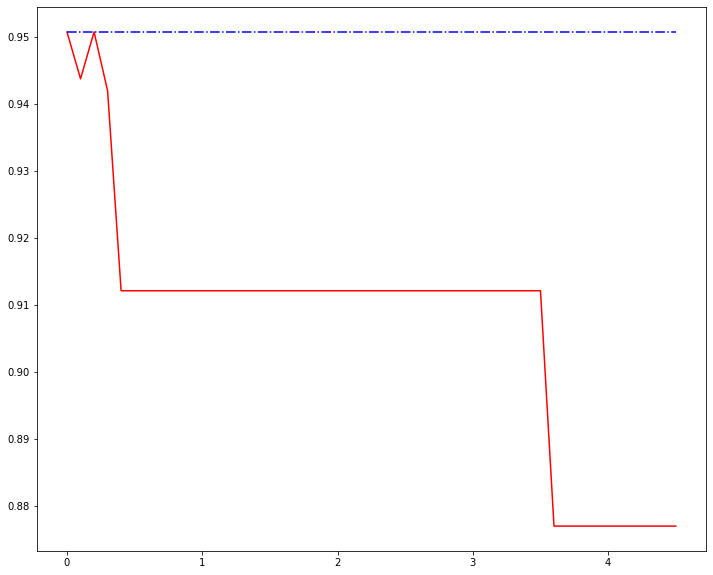

In [93]:
plt.figure(figsize=(12,10))
plt.plot(thresholds,x_opt_scores,c='r')
plt.plot(thresholds,x_ful_scores,c='b',ls='-.')

In [94]:
x_opt=SelectFromModel(regr,norm_order=1,threshold=3).fit_transform(sample,label)
cross_val_score(regr,x_opt,label,cv=5).mean()

0.9121720229777985

In [98]:
x_ful_scores=list()
x_opt_scores=list()
c_list=list()
for c in np.arange(0.01,10.01,0.5):
    regr_opt=LogisticRegression(penalty='l1', solver='liblinear',C=c,random_state=0,max_iter=10000)
    x_opt=SelectFromModel(regr_opt,norm_order=1).fit_transform(sample,label)
    x_opt_score=cross_val_score(regr_opt,x_opt,label,cv=5).mean()
    x_opt_scores.append(x_opt_score)
    x_ful_score=cross_val_score(regr_opt,sample,label,cv=5).mean()
    x_ful_scores.append(x_ful_score)
    c_list.append(c)
df=pd.DataFrame({'x_opt_score':x_opt_scores,'x_ful_scores':x_ful_scores,'C':c_list})

In [114]:
df.sort_values(by='x_opt_score')

,x_opt_score,x_ful_scores,C
0,0.919143,0.919143,0.01
1,0.949045,0.950800,0.51
4,0.949061,0.949061,2.01
5,0.949061,0.949061,2.51
6,0.949061,0.949061,3.01
7,0.949061,0.949061,3.51
3,0.950815,0.952569,1.51
2,0.952569,0.952569,1.01
8,0.952569,0.952569,4.01
16,0.954324,0.956078,8.01


In [118]:
np.argsort(df['x_opt_score']).iloc[-1]

11

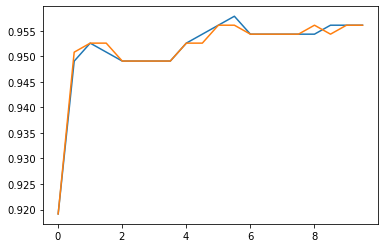

In [108]:
plt.plot(df.C,df.x_opt_score)
plt.plot(df.C,df.x_ful_scores)

In [119]:
regr_opt=LogisticRegression(penalty='l1', solver='liblinear',C=5.51,random_state=0,max_iter=10000)
x_opt=SelectFromModel(regr_opt,norm_order=1).fit_transform(sample,label)
x_opt.shape

(569, 14)

## 信用卡评分

In [126]:
data=pd.read_csv('/Users/hurrywish/Downloads/Python_sklearn/【第01部分 核心教程】sklearn深度学习框架入门与实战 3套/02.2019年Scikit-learn的机器学习入门到精通（附讲义、代码、数据集、参考资料） 258课/00.配套资料（代码、讲义、数据等）/00.配套资料（代码、讲义、数据等）/05逻辑回归与评分卡/rankingcard.csv',index_col=0)

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.feature_selection import SelectFromModel

In [127]:
data.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [141]:
data.drop_duplicates(inplace=True)

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

NameError: name 'data' is not defined